# TUTORIAL: ANÁLISIS EXPLORATORIO DE SERIES DE TIEMPO

En este tutorial veremos un ejemplo de uso de varias herramientas que resultan útiles al momento de realizar el Análisis Exploratorio de Series de Tiempo.

Contenido:

1. [La Serie de Tiempo a utilizar](#scrollTo=lU2P4zNgu_XC)
2. [Exploración inicial y limpieza de la Serie de Tiempo](#scrollTo=ft3SBWKpwO7i)
3. [Análisis Exploratorio de la Serie de Tiempo](#scrollTo=jqF5vpYxyM5C)
4. [Conclusiones del Análisis Exploratorio](#scrollTo=i_bzQYty8e0H&line=1&uniqifier=1)


## 1. La Serie de Tiempo a utilizar

Usaremos una serie de tiempo que contiene el registro histórico del comportamiento de la acción de Apple en la bolsa de valores desde el año 2010 hasta la actualidad.

Para poder leer este set de datos debemos primero instalar la librería *Yahoo Finance* que nos permite descargar fácilmente la serie de tiempo actualizada:

In [ ]:
# Instalar Yahoo Finance
!pip install yfinance

A continuación importamos la librería que acabamos de instalar junto con la librería Pandas, que nos permitirá acceder a la Serie de Tiempo:

In [ ]:
# Importar Pandas y Yahoo Finance
import pandas as pd
import yfinance as yf

Y ahora sí podemos descargar los datos correspondientes a esta acción:

In [ ]:
# Descargar datos acción Apple
ticker = 'AAPL'
df_apple = yf.download(ticker, start='2010-01-01')
df_apple

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454505,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465666,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362820,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351056,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393282,447610800
...,...,...,...,...,...,...
2024-08-12,216.070007,219.509995,215.600006,217.529999,217.529999,38028100
2024-08-13,219.009995,221.889999,219.009995,221.270004,221.270004,44155300
2024-08-14,220.570007,223.029999,219.699997,221.720001,221.720001,41960600


El set de datos contiene múltiples series de tiempo:

- *Open*: precio diario de apertura
- *High*: precio diario más alto alcanzado
- *Low*: precio diario más bajo alcanzado
- *Close*: precio diario de cierre
- *Adj Close*: precio ajustado diario de cierre
- *Volume*: volumen transado

Para este análisis nos enfocaremos únicamente en la serie *Close*:

In [ ]:
# Quedarnos únicamente con el valor de cierre
df = df_apple['Close'].to_frame() # to_frame para que siga siendo dataframe
df

,Close
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
...,...
2024-08-12,217.529999
2024-08-13,221.270004
2024-08-14,221.720001


## 2. Exploración inicial y limpieza de la Serie de Tiempo

Antes de comenzar a hacer el Análisis Exploratorio debemos verificar la integridad de los datos.

Usualmente esto implica:

1. Verificar los tipos de datos que tenemos
2. Verificar que el índice está en el formato *datetime* (para que sea una Serie de Tiempo en Pandas)
3. Realizar el manejo de registros duplicados (si existen)
4. Realizar el manejo de datos faltantes (si existen)

Veamos cómo llevar a cabo cada uno de estos pasos, comenzando con la verificación del tipo de datos que tenemos:

In [ ]:
# Verificar tipos de datos (cantidades numéricas)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3680 entries, 2010-01-04 to 2024-08-16
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3680 non-null   float64
dtypes: float64(1)
memory usage: 57.5 KB


Ahora verifiquemos que el índice es de tipo "datetime":

In [ ]:
# Verificar que el índice es de tipo "datetime"
df.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2024-08-05', '2024-08-06', '2024-08-07', '2024-08-08',
               '2024-08-09', '2024-08-12', '2024-08-13', '2024-08-14',
               '2024-08-15', '2024-08-16'],
              dtype='datetime64[ns]', name='Date', length=3680, freq=None)

Verifiquemos si existen registros (filas) duplicados:

In [ ]:
df.duplicated().any()

True

Lo importante es verificar que no existen fechas duplicadas, pues por cada día debemos tener un único registro de precio de cierre.

Esto lo podemos verificar accediendo al método `duplicated()` del índice:

In [ ]:
# Verificar si hay fechas duplicadas en el índice
df.index.duplicated().any()

False

No tenemos fechas duplicadas así que la Serie de Tiempo tiene una estructura correcta.

Verifiquemos si hay datos faltantes (celdas vacías en la columna *Close*):

In [ ]:
# Verificar si hay datos faltantes
df.isna().sum()

,0
Close,0


Tampoco hay datos faltantes.

Así que en este punto ya hemos verificado la integridad de la Serie de Tiempo y podemos comenzar a hacer el Análisis Exploratorio.

## 3. Análisis Exploratorio de la Serie de Tiempo

La idea básica del Análisis Exploratorio es entender el comportamiento de la Serie de Tiempo usando diferentes herramientas (estadística descriptiva, herramientas gráficas y **creatividad**, entre otras).

La idea es que en cada fase del análisis se escriban unas breves observaciones que al final se resumirán.

Y el análisis exploratorio siempre debe estar guiado por una pregunta que queramos resolver. Es decir que todo lo que hagamos durante el análisis debe estar orientado a responder esa pregunta.

Planteemos esta pregunta general:

> ¿Existe algún patrón que nos permita predecir el comportamiento del precio de cierre de la acción de Apple durante el periodo desde el año 2010 a la actualidad?

Y la idea ahora es ir respondiendo poco a poco esta pregunta.

Comencemos con el primer paso que casi siempre se debe llevar a cabo, que es generando un gráfico de la Serie de Tiempo:

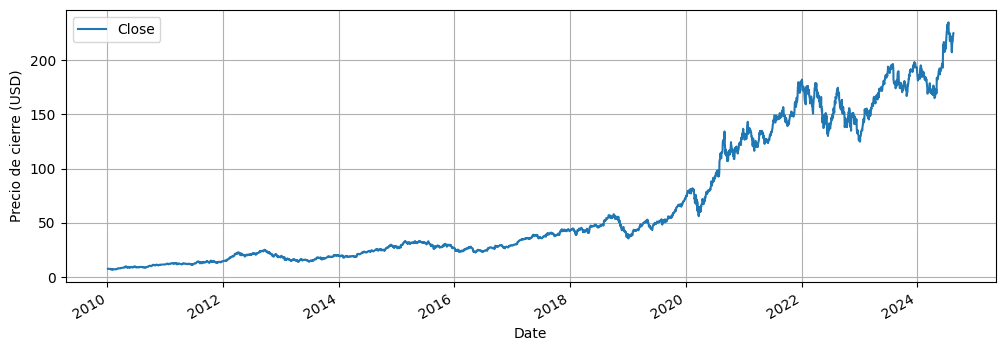

In [ ]:
ax = df.plot(figsize=(12,4))
ax.grid()
ax.set_ylabel('Precio de cierre (USD)');

Y a partir de este sencillo gráfico ya podemos realizar algunas observaciones:

- La serie tiene una **tendencia** creciente
- No se observa un comportamiento estacional
- El crecimiento del precio de cierre de la acción es mayor en el periodo 2019-actualidad en comparación con el periodo 2010-2019

También podemos usar herramientas de estadística descriptiva, junto con el método `describe()` de Pandas, para resumir numéricamente el comportamiento global de la Serie:

In [ ]:
df.describe()

,Close
count,3680.000000
mean,65.610261
std,60.651381
min,6.858929
25%,20.228661
50%,35.922499
75%,122.585001
max,234.820007


**Observaciones:**

- El precio mínimo de cierre de la acción es de 6.85 USD (alcanzado al comienzo del periodo) y el máximo de 234.82 USD (alcanzado durante 2024). Esto quiere decir que se tuvo una variación del 100*((234.82-6.85)/234.82) = 97.1%!!!
- La media y la desviación estándar observadas en el periodo analizado son de 65.48 USD y 60.5 USD respectivamente. Esta alta desviación (comparada con el valor de la media) indica que la acción ha tenido una alta volatilidad (es decir una alta variación en el periodo observado)

Veamos un poco más en detalle lo que ocurre con la tendencia de la serie.

Para eliminar las variaciones rápidas y lograr precisamente ver la tendencia podemos calcular lo que se conoce como una **media móvil**.

Con esta media móvil calcularemos promedios sobre una ventana móvil de 365 días (es decir promedios anuales). Para esto podemos usar los métodos `rolling()` y `mean()` de Pandas:

In [ ]:
df['media_movil'] = df['Close'].rolling(window=365).mean()
df

,Close,media_movil
Date,,
2010-01-04,7.643214,NaN
2010-01-05,7.656429,NaN
2010-01-06,7.534643,NaN
2010-01-07,7.520714,NaN
2010-01-08,7.570714,NaN
...,...,...
2024-08-12,217.529999,183.688493
2024-08-13,221.270004,183.896603
2024-08-14,221.720001,184.104302


Y ahora podemos dibujar un gráfico que contenta el comportamiento día a día de la acción y superponer a este la media móvil recién calculada:

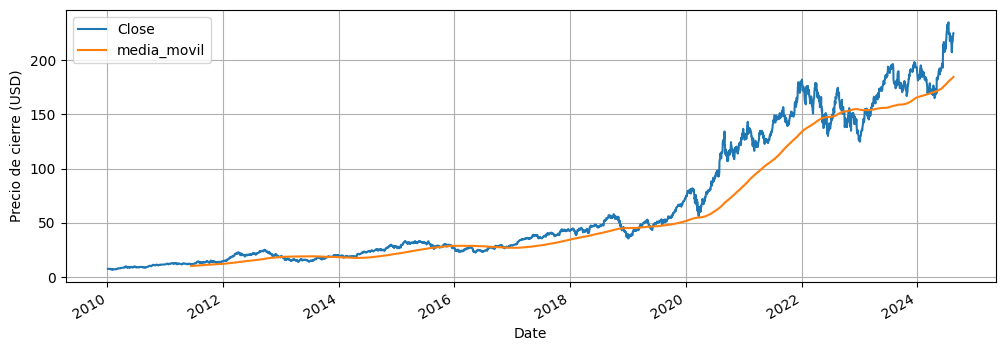

In [ ]:
ax = df.plot(figsize=(12,4))
ax.grid()
ax.set_ylabel('Precio de cierre (USD)');

**Observaciones:**

- Con la media móvil se sigue viendo un crecimiento sostenido de la acción pero con un punto de inflexión aproximadamente a mediados de 2020.

Y en este punto podemos, por ejemplo, comenzar a usar nuestra creatividad para añadir elementos a este Análisis Exploratorio.

Hemos visto que en términos generales la serie tiene una tendencia positiva. ¿Qué pasa si no analizamos el valor de la acción y en lugar de ello calculamos por ejemplo su **incremento porcentual con respecto a la media móvil**?:

In [ ]:
df['cambio_%'] = 100*abs((df['Close']-df['media_movil'])/(df['media_movil']))
df

,Close,media_movil,cambio_%
Date,,,
2010-01-04,7.643214,NaN,NaN
2010-01-05,7.656429,NaN,NaN
2010-01-06,7.534643,NaN,NaN
2010-01-07,7.520714,NaN,NaN
2010-01-08,7.570714,NaN,NaN
...,...,...,...
2024-08-12,217.529999,183.688493,18.423313
2024-08-13,221.270004,183.896603,20.323052
2024-08-14,221.720001,184.104302,20.431733


Y veamos el comportamiento de este cambio porcentual junto con la Serie original y su media móvil:

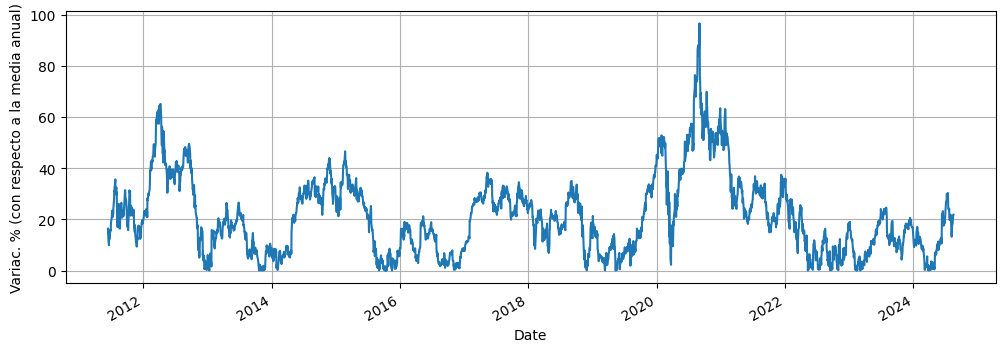

In [ ]:
ax = df['cambio_%'].plot(figsize=(12,4))
ax.grid()
ax.set_ylabel('Variac. % (con respecto a la media anual)');

Y podemos añadir elementos al gráfico anterior para mostrar, por ejemplo, el promedio de esta variación porcentual:

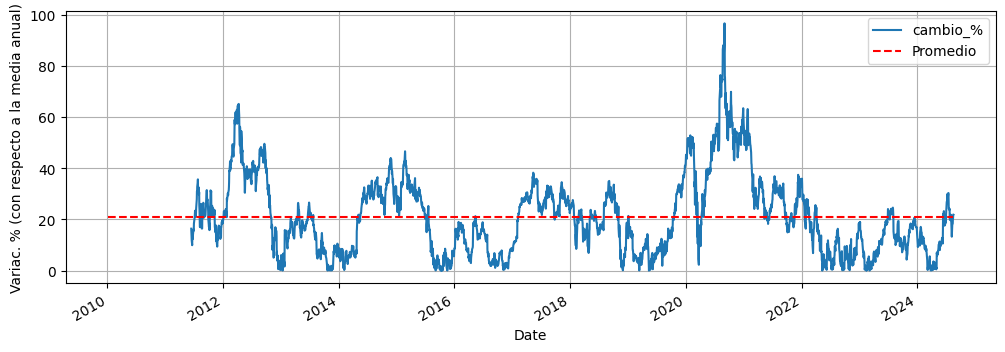

In [ ]:
ax = df['cambio_%'].plot(figsize=(12,4))

# Añadir promedio
ax.hlines(df['cambio_%'].mean(),xmin=df.index.min(), xmax=df.index.max(),
          color='r', linestyle='--', label='Promedio')
ax.grid()
ax.legend()
ax.set_ylabel('Variac. % (con respecto a la media anual)');

Observaciones:

- Los cambios porcentuales con respecto a la media móvil anual oscilan entre el 0 y casi el 100% con un promedio del 20%
- Hacia la segunda mitad de 2020 se observa un aparente valor extremo con una variación porcentual de casi el 100% con respecto a la media, que es el mismo punto de inflexión observado anteriormente.

Podemos encontrar estos valores extremos (*outliers*) en la variación porcentual generando un gráfico de cajas (*boxplot*):

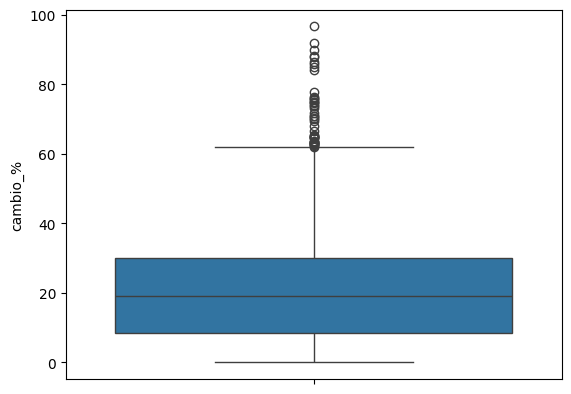

In [ ]:
import seaborn as sns

sns.boxplot(df['cambio_%']);

En el gráfico anterior los círculos indican valores extremos, que en este caso corresponden a variaciones porcentuales por encima del 60%.

Intentemos ver cuándo se alcanzan estos valores extremos:

In [ ]:
# Buscar valores extremos
outliers = df[df['cambio_%']>60]['Close']
outliers

,Close
Date,
2012-03-19,21.467857
2012-03-20,21.641430
2012-03-21,21.517857
2012-03-26,21.677856
2012-03-27,21.945715
...,...
2020-12-28,136.690002
2020-12-29,134.869995
2021-01-25,142.919998


Y resultan más fáciles de interpretar si los superponemos a la Serie de Tiempo original:

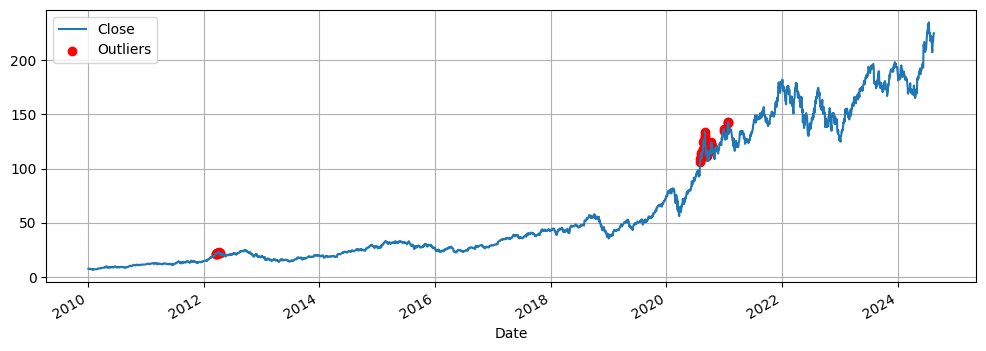

In [ ]:
# Graficar serie de tiempo original
ax = df['Close'].plot(figsize=(12,4))

# Y superponer (en rojo) los valores extremos
ax.scatter(outliers.index, outliers, color='r', label='Outliers')

# Grilla y etiquetas
ax.legend()
ax.grid();

**Observaciones:**

- Aunque hubo algunos picos de crecimiento porcentual mayor del 60% a partir del año 2012, los mayores crecimientos porcentuales (superiores a este 60%) se dieron especialmente durante la segunda mitad del año 2020.

Podemos calcular una ventana móvil pero para la desviación estándar y así determinar qué tan volátil ha sido el precio de la acción a lo largo del tiempo:

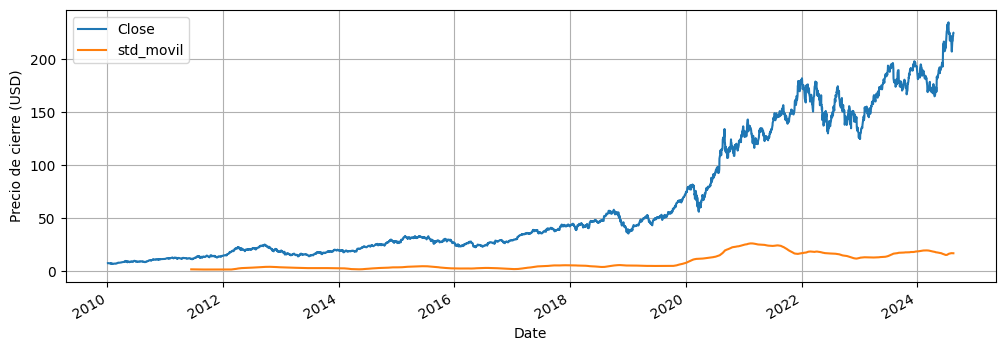

In [ ]:
df['std_movil'] = df['Close'].rolling(window=365).std()

# Graficar
ax = df[['Close','std_movil']].plot(figsize=(12,4))

# Ajustar gráfica
ax.legend()
ax.grid()
ax.set_ylabel('Precio de cierre (USD)');

**Observaciones:**

- Hasta aproximadamente finales del año 2019 la volatilidad de la Serie ha sido relativamente baja
- Y esta volatilidad se ha incrementado a partir del año 2020, alcanzando niveles máximos entre la segunda mitad del año 2020 y todo el año 2021.

Podemos usar también gráficos de barras para ver este comportamiento de la volatilidad un poco más en detalle:

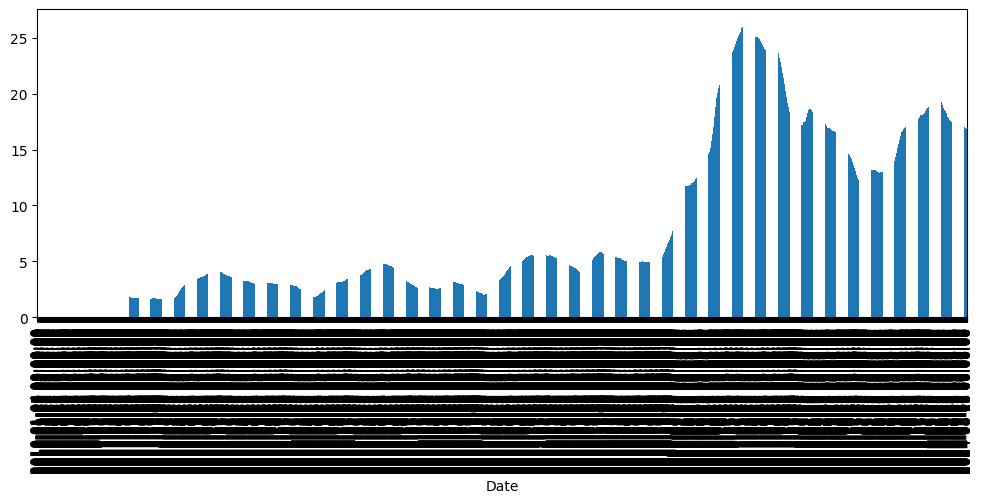

In [ ]:
df['std_movil'].plot.bar(figsize=(12,4));

Si intentamos hacer lo anterior obtendremos una gráfica que requiere demasiado tiempo para ser generada y que, además, es muy difícil de interpretar.

Esto se debe a que por cada día se generará un gráfico de barras correspondiente.

En este caso lo más adecuado es **remuestrear** la Serie de Tiempo, para que en lugar de una frecuencia diaria tenga, por ejemplo, una frecuencia anual.

De esta forma, tendremos un panorama general del comportamiento de la Serie para las diferentes variables que hemos venido analizando:

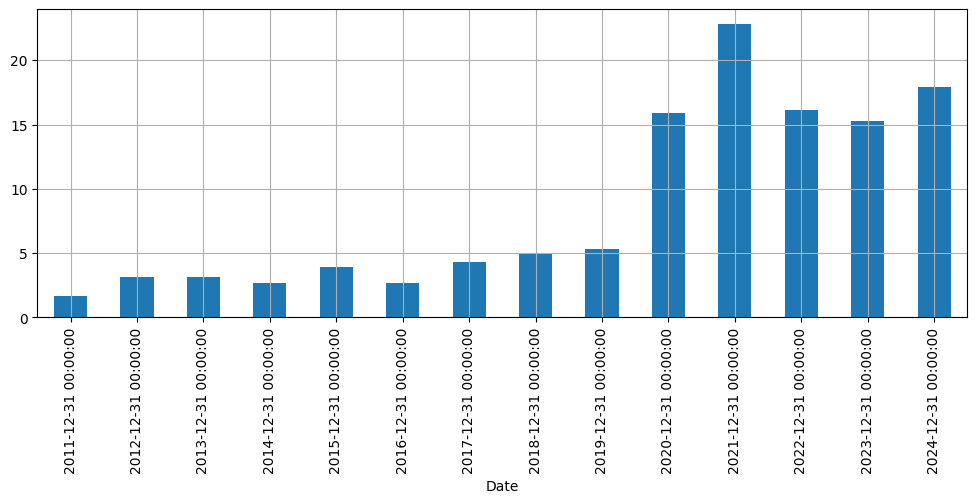

In [ ]:
# Remuestreo anual. Por cada año se calculará la media de
# cada variable
df_anual = df.resample('Y').mean()

# Y ahora sí generemos el gráfico
ax = df_anual['std_movil'].dropna().plot.bar(figsize=(12,4));
ax.grid()

**Observaciones:**

- Entre 2010 y 2019 se lograron niveles bajos de volatilidad (desviaciones de 5 USD o menos)
- A partir del año 2020 y hasta la fecha se observan altos niveles de volatilidad (desviaciones de entre 15 y casi 25 USD), siendo el año 2021 el más volátil en este periodo.

Y aunque no resulta aparente, podemos calcular y graficar la [función de autocorrelación](https://youtu.be/ejS5LKUThMw) de la Serie de Tiempo para determinar si existe algún componente estacional:

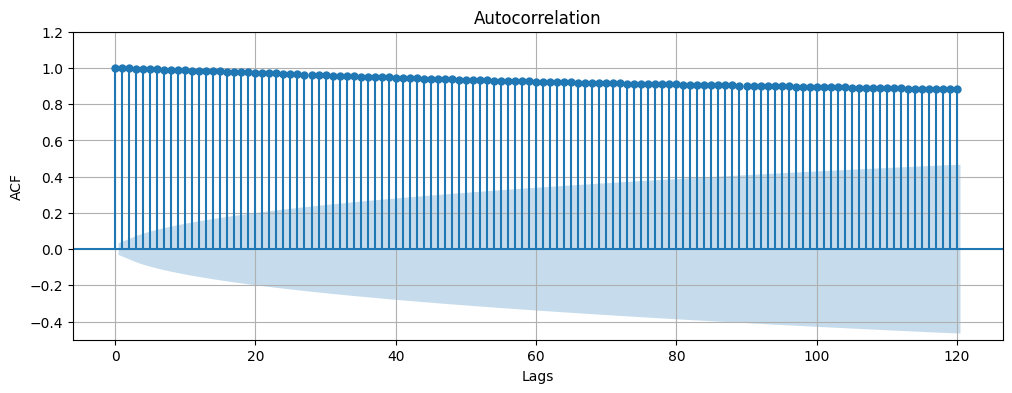

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Calcular y generar gráfico
fig, ax = plt.subplots(figsize=(12, 4))
sm.graphics.tsa.plot_acf(df['Close'].dropna(), lags=120, ax=ax)
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.grid(True)
plt.ylim([-0.5,1.2]);

**Observaciones:**

- La función de autocorrelación no muestra un componente estacional marcado, pero sí una tendencia

## 4. Conclusiones del Análisis Exploratorio

Para terminar podemos tomar todas las observaciones hechas a lo largo del Análisis Exploratorio para sintetizar la respuesta a la pregunta planteada inicialmente:

> ¿Existe algún patrón que nos permita predecir el comportamiento del precio de cierre de la acción de Apple durante el periodo desde el año 2010 a la actualidad?

Algunas respuestas a esta pregunta serían:

- El comportamiento de la acción (precio de cierre) presenta unatendencia creciente sin estacionalidad clara.
- A partir de 2020, se observa un aumento significativo en la volatilidad y en los porcentajes de crecimiento, especialmente en la segunda mitad de 2020 y durante 2021.
- La alta volatilidad y la falta de patrones estacionales hacen que la predicción del comportamiento a futuro sea complicada.